In [1]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# 搭建BP网络
net = nn.Sequential(
    nn.Linear(7, 50),
    nn.ReLU(),
    nn.Linear(50, 200),
    nn.ReLU(),
    nn.Linear(200, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)
print(net)

# 初始化网络参数
optimizer = torch.optim.SGD(net.parameters(), lr=0.03)  # 构建随机梯度下降优化器, lr为学习率
loss_func = torch.nn.CrossEntropyLoss()  # 构建交叉熵损失函数
losses = []
acces = []
eval_losses = []  # 测试集损失和准确率
eval_acces = []

Sequential(
  (0): Linear(in_features=7, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=50, bias=True)
  (5): ReLU()
  (6): Linear(in_features=50, out_features=10, bias=True)
)


In [3]:
# 读入训练集并整理
train_set = np.loadtxt("train_remastered.csv", delimiter=",", dtype=("float32"), skiprows=1)
label = torch.from_numpy(train_set[:, [-1]]).long()
tseq = np.array(train_set[:, 1:-1])

# 计算数据特征
x_avg = np.mean(tseq, axis=1, keepdims=True)  # 算术均值
x_std = np.std(tseq, axis=1, ddof=1, keepdims=True)  # 标准差
x_var = np.var(tseq, axis=1, ddof=1, keepdims=True)  # 方差
x_ptp = np.ptp(tseq, axis=1, keepdims=True)  # 峰峰值
x_rms = np.sqrt(np.mean(tseq ** 2, axis=1, keepdims=True))  # 有效值
x_skw = stats.skew(tseq, axis=1).reshape(tseq.shape[0], 1)  # 偏度
x_kur = stats.kurtosis(tseq, axis=1).reshape(tseq.shape[0], 1)  # 峰度
feature = torch.from_numpy(np.array([x_avg, x_std, x_var,
                                     x_ptp, x_rms, x_skw, x_kur]).squeeze().T)
print(feature.size())

torch.Size([792, 7])


In [4]:
deal_set = TensorDataset(feature, label)
train_data = DataLoader(dataset=deal_set, batch_size=64, shuffle=True, num_workers=0)


epoch 0 finished: loss=2.129864,  acc=11.554087
epoch 1 finished: loss=1.939044,  acc=11.961538
epoch 2 finished: loss=1.872122,  acc=11.595353
epoch 3 finished: loss=1.796441,  acc=12.277244
epoch 4 finished: loss=1.729851,  acc=12.219151
epoch 5 finished: loss=1.664354,  acc=12.158654
epoch 6 finished: loss=1.621545,  acc=12.040865
epoch 7 finished: loss=1.564707,  acc=12.187500
epoch 8 finished: loss=1.526001,  acc=11.868990
epoch 9 finished: loss=1.492051,  acc=11.824119
epoch 10 finished: loss=1.437938,  acc=12.031651
epoch 11 finished: loss=1.414108,  acc=11.851763
epoch 12 finished: loss=1.410055,  acc=11.804087
epoch 13 finished: loss=1.326768,  acc=12.038061
epoch 14 finished: loss=1.291106,  acc=11.974359
epoch 15 finished: loss=1.275155,  acc=11.807692
epoch 16 finished: loss=1.269828,  acc=11.986378
epoch 17 finished: loss=1.266358,  acc=11.896234
epoch 18 finished: loss=1.267452,  acc=11.659856
epoch 19 finished: loss=1.216839,  acc=11.759615


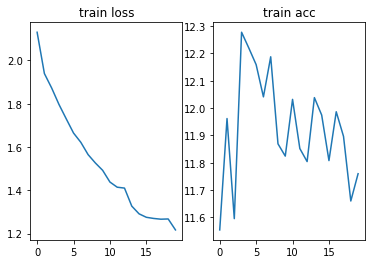

In [5]:
# 循环执行epoch
for e in range(20):
    train_loss = 0
    train_acc = 0
    net.train()  # 网络开始训练
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = loss_func(out, label.squeeze())
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.item()
        # 计算分类的准确率
        _, pred = out.max(1)  # 挑选出输出时值最大的位置
        num_correct = (pred == label).sum().item()  # 记录正确的个数
        acc = num_correct / im.shape[0]  # 计算精确率
        train_acc += acc

    print("epoch %d finished: loss=%6f,  acc=%6f"
          % (e, train_loss / len(train_data), train_acc / len(train_data)))
    losses.append(train_loss / len(train_data))
    acces.append(train_acc / len(train_data))

# 绘制测试曲线
fig = plt.figure()
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)
ax.set_title('train loss')
ax.plot(np.arange(len(losses)), losses)
bx.set_title('train acc')
bx.plot(np.arange(len(acces)), acces)
# bx.plot(np.arange(len(eval_losses)), eval_losses)
# plt.show()

In [6]:
# 读入测试集
test_set = np.loadtxt("test_remastered.csv", delimiter=",", dtype=("float32"), skiprows=1)
tseq = np.array(test_set[:, 1:])
x_avg = np.mean(tseq, axis=1, keepdims=True)  # 算术均值
x_std = np.std(tseq, axis=1, ddof=1, keepdims=True)  # 标准差
x_var = np.var(tseq, axis=1, ddof=1, keepdims=True)  # 方差
x_ptp = np.ptp(tseq, axis=1, keepdims=True)  # 峰峰值
x_rms = np.sqrt(np.mean(tseq ** 2, axis=1, keepdims=True))  # 有效值
x_skw = stats.skew(tseq, axis=1).reshape(tseq.shape[0], 1)  # 偏度
x_kur = stats.kurtosis(tseq, axis=1).reshape(tseq.shape[0], 1)  # 峰度
feature = torch.from_numpy(np.array([x_avg, x_std, x_var,
                                     x_ptp, x_rms, x_skw, x_kur]).squeeze().T)
print(feature.size())

torch.Size([528, 7])


In [7]:
deal_set = TensorDataset(feature)
print(deal_set)

In [8]:
test_data = DataLoader(dataset=deal_set, batch_size=32, shuffle=False, num_workers=0)
print(test_data)
net.eval()  # 将模型改为预测模式
res = []

In [9]:
for im in test_data:
    im = Variable(im[0])
    out = net(im)
    _,pred = out.max(1)
    res.append(pred)

In [10]:
print(res)

[tensor([9, 7, 9, 0, 0, 9, 7, 7, 0, 0, 7, 0, 7, 0, 0, 7, 0, 9, 9, 0, 9, 9, 7, 9,
        0, 7, 7, 0, 0, 0, 0, 9]), tensor([0, 0, 9, 0, 0, 7, 7, 9, 9, 0, 0, 9, 9, 0, 9, 9, 7, 0, 0, 7, 0, 7, 0, 9,
        7, 9, 9, 9, 9, 7, 9, 7]), tensor([0, 7, 7, 9, 0, 9, 9, 0, 0, 0, 9, 9, 0, 0, 0, 0, 9, 9, 0, 0, 0, 0, 9, 7,
        9, 0, 7, 0, 9, 7, 9, 0]), tensor([0, 7, 9, 0, 0, 9, 7, 0, 9, 0, 9, 0, 9, 9, 0, 9, 0, 9, 7, 9, 9, 0, 0, 9,
        9, 9, 7, 9, 9, 9, 9, 7]), tensor([0, 7, 9, 7, 9, 7, 0, 0, 0, 0, 0, 0, 7, 9, 7, 9, 9, 0, 9, 7, 9, 7, 9, 9,
        9, 0, 9, 9, 9, 0, 7, 9]), tensor([0, 0, 0, 0, 0, 7, 7, 9, 9, 0, 9, 0, 0, 7, 0, 7, 0, 9, 7, 0, 9, 9, 0, 9,
        9, 9, 0, 0, 7, 9, 7, 7]), tensor([0, 9, 7, 9, 0, 7, 9, 0, 9, 0, 9, 7, 7, 7, 9, 0, 7, 0, 9, 7, 0, 9, 0, 9,
        7, 0, 0, 9, 9, 7, 0, 9]), tensor([0, 9, 9, 9, 0, 0, 9, 0, 9, 0, 0, 9, 0, 7, 9, 0, 0, 0, 9, 0, 0, 9, 0, 9,
        7, 9, 0, 9, 0, 9, 9, 9]), tensor([7, 0, 7, 7, 7, 0, 9, 0, 0, 9, 0, 7, 0, 9, 9, 9, 9, 7, 0, 9, 9, 9, 9, 9,
       